In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [4]:
df = pd.read_csv('CarPrice_Assignment.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [16]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
!pip install word2number

In [12]:
from word2number import w2n

In [15]:
for i in range(len(df['cylindernumber'])):
  df['cylindernumber'][i] = w2n.word_to_num(df['cylindernumber'][i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
df['cylindernumber'] = df['cylindernumber'].astype('int64')

In [20]:
numeric_data = df.select_dtypes(include = ['int64', 'float64'])

In [24]:
numeric_data.drop(columns = ['car_ID', 'symboling'], inplace = True)
numeric_data

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,4,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,109.1,188.8,68.8,55.5,3049,4,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,109.1,188.8,68.9,55.5,3012,6,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,109.1,188.8,68.9,55.5,3217,6,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [34]:
X = numeric_data.iloc[:,:14].values
y = numeric_data.iloc[:,14].values

In [47]:
X_train, X_test, y_train, y_test = tts(X,y)

In [48]:
X_train

array([[  95.7,  166.3,   64.4, ..., 4500. ,   34. ,   36. ],
       [  95.9,  173.2,   66.3, ..., 5000. ,   19. ,   24. ],
       [ 104.3,  188.8,   67.2, ..., 5400. ,   23. ,   28. ],
       ...,
       [  98.4,  175.7,   72.3, ..., 5750. ,   17. ,   28. ],
       [ 107.9,  186.7,   68.4, ..., 5000. ,   19. ,   24. ],
       [ 102.7,  178.4,   68. , ..., 5000. ,   19. ,   24. ]])

In [52]:
model = LinearRegression()

In [53]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
y_pred = model.predict(X_test)

In [55]:
import seaborn as sns

In [58]:
compare = pd.DataFrame({"actual" : y_test, "predicted" : y_pred})

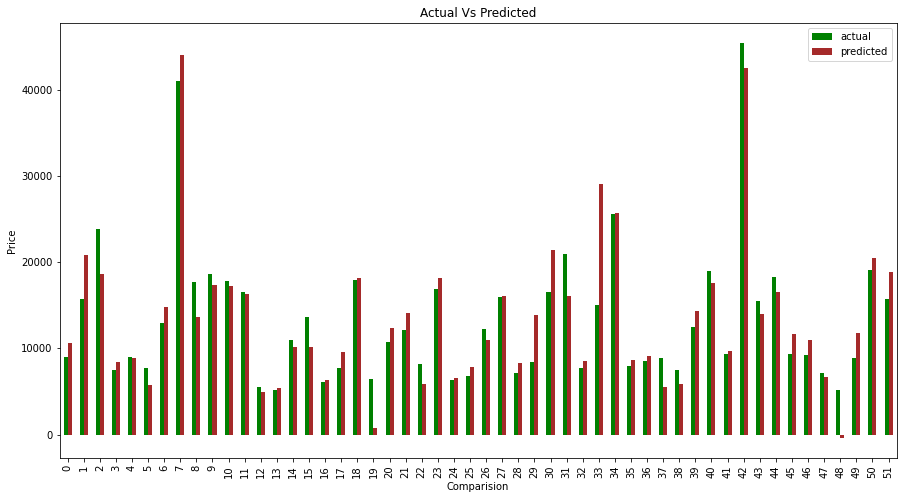

In [72]:
compare.plot(figsize = (15,8), kind= 'bar', color = ['g','brown'])
plt.xlabel("Comparision")
plt.ylabel("Price")
plt.title("Actual Vs Predicted")
plt.show()

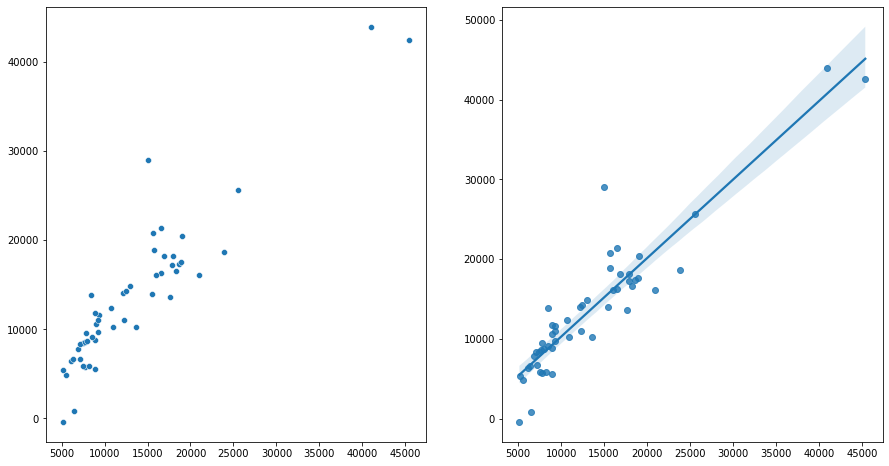

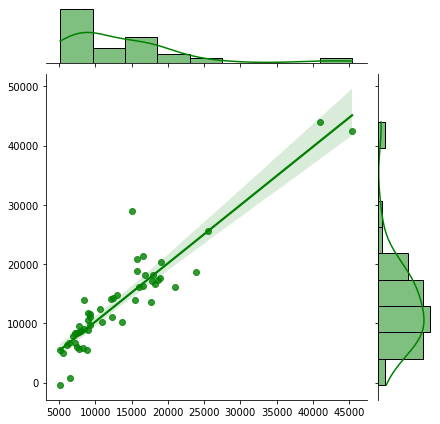

In [126]:
plt.figure(figsize = (15,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.scatterplot(x = y_test, y = y_pred)
ax2 = plt.subplot2grid((1,2),(0,1))
sns.regplot(x = y_test, y = y_pred)
sns.jointplot(x = y_test, y =y_pred,kind = 'reg', color = 'g')
